### Name: Muley, Tushar
#### Assignment: Assignment 5 Week 3
#### Date: Dec 19, 2021

## Assignment 5.1
Implement the movie review classifier found in section 3.4 of Deep Learning with Python.

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17465344/17464789 [==============================] - 1s 0us/step


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\Tushar\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Tushar\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths 

In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

#### Decode one of these reviews back to English

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 0s 0us/step


#### Encoding the integer sequences into a binary matrix

In [6]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)  

In [7]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#### Building your network

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential ([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

#### Complie the model

In [10]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#### Validation

In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#### Training set

In [12]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 7s 136ms/step - loss: 0.5928 - accuracy: 0.7062 - val_loss: 0.4317 - val_accuracy: 0.8234
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3378 - accuracy: 0.8964 - val_loss: 0.3248 - val_accuracy: 0.8748
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2406 - accuracy: 0.9269 - val_loss: 0.2798 - val_accuracy: 0.8903
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1856 - accuracy: 0.9417 - val_loss: 0.2827 - val_accuracy: 0.8864
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1464 - accuracy: 0.9542 - val_loss: 0.2961 - val_accuracy: 0.8831
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1197 - accuracy: 0.9647 - val_loss: 0.2943 - val_accuracy: 0.8870
Epoch 7/20
30/30 [==============================] - 2s 43ms/step - loss: 0.1016 - accuracy: 0.9707 - val_loss: 0.3267 - val_accuracy: 0.8767
Epoch 8/20
3

In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### Plotting the training and validation loss

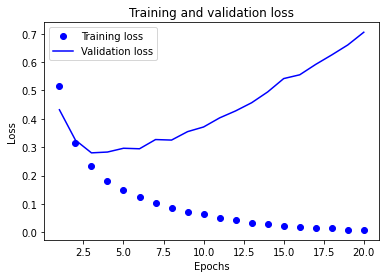

In [15]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### Plotting the training and validation accuracy

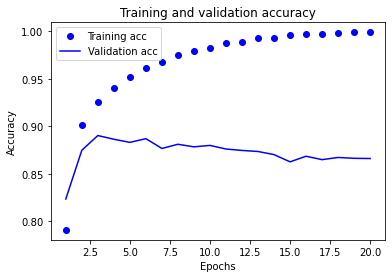

In [18]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### Retraining a model from scratch

In [21]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 13ms/step - loss: 0.5546 - accuracy: 0.7265
Epoch 2/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2702 - accuracy: 0.9123
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.1997 - accuracy: 0.9313
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3289 - accuracy: 0.8707: 0s - loss:


In [22]:
results

[0.3288571238517761, 0.8706799745559692]

#### Using a trained network to generate predictions on new data

In [23]:
model.predict(x_test)

array([[0.22420892],
       [0.9990783 ],
       [0.9645244 ],
       ...,
       [0.185489  ],
       [0.12515825],
       [0.80406165]], dtype=float32)

## Assignment 5.2 - 
Classifying newswires: a multiclass classification example
Implement the news classifier found in section 3.5 of Deep Learning with Python.

#### Load data

In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

C:\Users\Tushar\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Tushar\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

#### Decoding newswires back to text

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
    train_data[0]])

In [6]:
train_labels[10]

3

#### Preparing the data

In [7]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data) 

In [8]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [9]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

#### Building your network

In [10]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

#### Compiling the model

In [11]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### Validating your approach

In [12]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

#### Training the model

In [13]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 8s 206ms/step - loss: 3.2135 - accuracy: 0.3811 - val_loss: 1.8512 - val_accuracy: 0.6290
Epoch 2/20
16/16 [==============================] - 1s 39ms/step - loss: 1.6128 - accuracy: 0.6666 - val_loss: 1.3601 - val_accuracy: 0.7090
Epoch 3/20
16/16 [==============================] - 1s 41ms/step - loss: 1.1183 - accuracy: 0.7668 - val_loss: 1.1756 - val_accuracy: 0.7570
Epoch 4/20
16/16 [==============================] - 1s 46ms/step - loss: 0.9017 - accuracy: 0.8116 - val_loss: 1.0637 - val_accuracy: 0.7770
Epoch 5/20
16/16 [==============================] - 1s 45ms/step - loss: 0.6961 - accuracy: 0.8586 - val_loss: 0.9799 - val_accuracy: 0.7990
Epoch 6/20
16/16 [==============================] - 1s 42ms/step - loss: 0.5594 - accuracy: 0.8881 - val_loss: 0.9449 - val_accuracy: 0.8020
Epoch 7/20
16/16 [==============================] - 1s 38ms/step - loss: 0.4525 - accuracy: 0.9135 - val_loss: 0.9265 - val_accuracy: 0.8020
Epoch 8/20
1

#### Plotting the training and validation loss

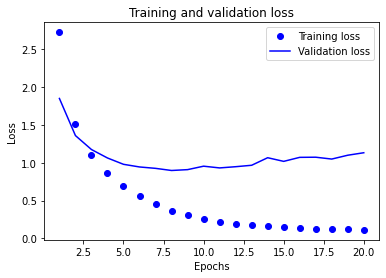

In [14]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### Plotting the training and validation accuracy

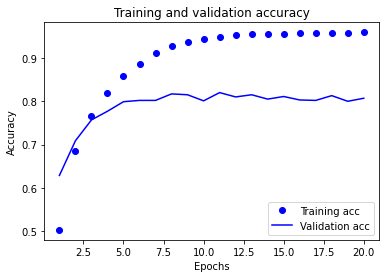

In [16]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### Retraining a model from scratch

In [17]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 2s 66ms/step - loss: 3.0504 - accuracy: 0.4232 - val_loss: 1.7205 - val_accuracy: 0.6410
Epoch 2/9
16/16 [==============================] - 1s 41ms/step - loss: 1.5002 - accuracy: 0.6956 - val_loss: 1.3097 - val_accuracy: 0.7100
Epoch 3/9
16/16 [==============================] - 1s 45ms/step - loss: 1.0782 - accuracy: 0.7692 - val_loss: 1.1295 - val_accuracy: 0.7500
Epoch 4/9
16/16 [==============================] - 1s 46ms/step - loss: 0.8361 - accuracy: 0.8212 - val_loss: 1.0276 - val_accuracy: 0.7800
Epoch 5/9
16/16 [==============================] - 1s 47ms/step - loss: 0.6682 - accuracy: 0.8611 - val_loss: 0.9737 - val_accuracy: 0.7910
Epoch 6/9
16/16 [==============================] - 1s 49ms/step - loss: 0.5204 - accuracy: 0.8938 - val_loss: 0.9255 - val_accuracy: 0.8090
Epoch 7/9
16/16 [==============================] - ETA: 0s - loss: 0.4221 - accuracy: 0.91 - 1s 46ms/step - loss: 0.4214 - accuracy: 0.9141 - val_loss: 0.9039 -

In [18]:
results

[0.9773288369178772, 0.7831701040267944]

In [20]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.19412288512911843

#### Generating predictions on new data

In [21]:
predictions = model.predict(x_test)

In [22]:
predictions[0].shape

(46,)

In [23]:
np.sum(predictions[0])

1.0

In [24]:
np.argmax(predictions[0])

3

#### A different way to handle the labels and the loss

In [25]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [26]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

#### The importance of having sufficiently large intermediate layers

In [27]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 3s 20ms/step - loss: 3.6646 - accuracy: 0.0873 - val_loss: 3.1689 - val_accuracy: 0.2580
Epoch 2/20
63/63 [==============================] - 1s 14ms/step - loss: 2.9481 - accuracy: 0.2650 - val_loss: 2.5934 - val_accuracy: 0.2940
Epoch 3/20
63/63 [==============================] - 1s 16ms/step - loss: 2.3941 - accuracy: 0.3167 - val_loss: 2.1410 - val_accuracy: 0.3460
Epoch 4/20
63/63 [==============================] - 1s 13ms/step - loss: 1.8790 - accuracy: 0.3711 - val_loss: 1.7268 - val_accuracy: 0.4880
Epoch 5/20
63/63 [==============================] - 1s 15ms/step - loss: 1.5390 - accuracy: 0.5170 - val_loss: 1.6470 - val_accuracy: 0.4750
Epoch 6/20
63/63 [==============================] - 5s 73ms/step - loss: 1.4122 - accuracy: 0.5441 - val_loss: 1.5302 - val_accuracy: 0.6410
Epoch 7/20
63/63 [==============================] - 1s 20ms/step - loss: 1.2311 - accuracy: 0.6838 - val_loss: 1.4330 - val_accuracy: 0.6650
Epoch 8/20
63

## Assignment 5.3
Implement the housing price regression model found in section 3.6 of Deep Learning with Python.

#### The Boston Housing Price dataset

In [28]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 1us/step


In [29]:
train_data.shape

(404, 13)

In [30]:
test_data.shape

(102, 13)

In [31]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

#### Preparing the data

In [32]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

#### Building your network

In [33]:
import keras
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

#### Validating your approach using K-fold validation

In [35]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [36]:
all_scores

[1.982920527458191, 2.484312057495117, 2.6799979209899902, 2.448901891708374]

In [37]:
np.mean(all_scores)

2.399033099412918

#### Saving the validation logs at each fold

In [39]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


#### Building the history of successive mean K-fold validation scores

In [40]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

#### Plotting validation scores

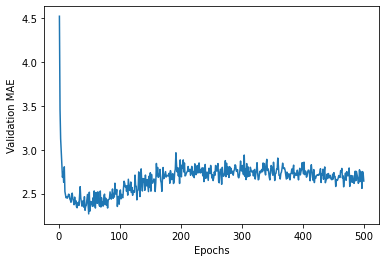

In [41]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

#### Plotting validation scores, excluding the first 10 data points

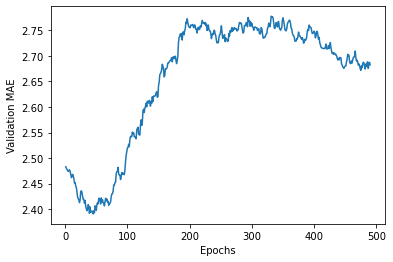

In [42]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

#### Training the final model

In [44]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 16.6004 - mae: 2.6129


In [45]:
test_mae_score

2.612933874130249

#### Generating predictions on new data

In [46]:
predictions = model.predict(test_data)
predictions[0]

array([8.1121025], dtype=float32)